In [1]:
# Самое необходимое и нужное. Тут и происхожит обучение. В данном случает метод Случайный лес 

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv('microarray_BRCA_public.csv')
y = df.type
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
X = df.drop(df.columns[0], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)
dict = { 1 : 'basal' , 3 : 'luminal_A', 4 : 'luminal_B', 0 : 'HER', 2 : 'cell_line', 5 : 'normal'}

clf = GradientBoostingClassifier(n_estimators=30, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
prediction = clf.predict(X_test)
result = list(map(dict.get, prediction))
y_test_cancer_type = list(map(dict.get, y_test))

print(clf.score(X_test, y_test))



     1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at   1316_at  \
20   10.392638  7.334408  6.848586  7.020486   3.228065  7.815439  5.448470   
23   10.757742  7.462675  5.704695  7.485845   3.013040  7.305836  4.767045   
117  10.118506  7.068413  6.994914  7.361184   3.282575  7.189976  5.108658   
113  10.623768  6.372760  7.210036  7.379072   2.932397  8.403958  5.136072   
57   10.422371  8.933601  5.630488  6.881770   3.097372  6.273211  5.414001   
..         ...       ...       ...       ...        ...       ...       ...   
40   10.558869  7.308902  5.961694  7.226882   3.018039  7.748879  5.391552   
72   10.554179  7.018811  7.143966  7.079589   2.944623  7.761745  5.191534   
31    9.274732  6.293182  6.048170  7.683239   3.358138  7.892531  6.053543   
104  11.002343  7.477163  6.406290  7.805232   3.370928  6.343223  5.131323   
25   10.099564  9.357799  4.763602  7.465030   3.376371  5.707322  5.176281   

      1320_at  1405_i_at   1431_at  ...  AFFX-r2-Ec

In [2]:
#Проверка как работает

print('Было', y_test_cancer_type, '\nстало', result)

NameError: name 'y_test_cancer_type' is not defined

In [4]:
# Кросс-валидация

from sklearn.model_selection import cross_val_score


scores = cross_val_score(clf, X, y, cv=5)
print('Cross-validation scores:', scores)

'''Cross-validation scores: [0.95833333 0.91666667 0.91666667 0.875      0.875     ]
6 m 31 sec 

Cross-validation scores: [0.95833333 0.91666667 0.91666667 0.875      0.875     ]
5 m 17 sec

'''

Cross-validation scores: [0.95833333 0.91666667 0.91666667 0.875      0.875     ]


[[4 0 0 0 0]
 [0 5 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


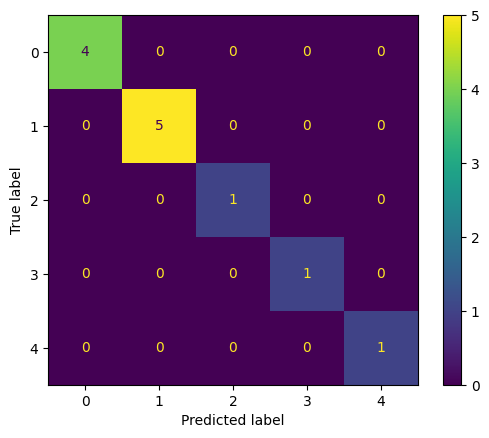

In [12]:
# Еще один метод проверки 

cm = confusion_matrix(y_test, prediction)
print(cm)
vis = ConfusionMatrixDisplay(confusion_matrix=cm)
vis.plot()
plt.show()


In [17]:
# Самый базовый метод проверки 

print(clf.score(X_test, y_test))


'''n_estimators=10 время 1 м 15 сек результат 0.8(3)
n_estimators=5 время 41 сек результат 0,75
n_estimators=25 время 2 м 39 сек результат 0,8(3)
n_estimators=50 время 3 м 15 сек результат 0,8(3)
n_estimators=100 время 3 м 00 сек результат 0,8(3)'''

1.0


'n_estimators=10 время 1 м 15 сек результат 0.8(3)\nn_estimators=5 время 41 сек результат 0,75\nn_estimators=25 время 2 м 39 сек результат 0,8(3)\nn_estimators=50 время 3 м 15 сек результат 0,8(3)\nn_estimators=100 время 3 м 00 сек результат 0,8(3)'